#Linear regression with sklearn API

The objective of this colab is to demonstrate how to build a linenar regression model with `sklearn`. We will be using the following set up:

1. Dataset: California Housing
2. Linear regression API: `LinearRegression`
3. Training: `fit` (normal equation) and `cross_validate` (normal equation with cross  validation).
4. Evaluation: `score` (r2 Score) and `cross_val_score` with different scoring parameters.

We will study the model diaginosis with `LearningCurve` and learn how to examine the learned model or weight vector.



In [ ]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve 
from sklearn.model_selection import ShuffleSplit

from sklearn.metrics import mean_squared_error

from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler 




In [ ]:
np.random.seed(42)
plt.style.use('seaborn')


We will use `ShuffleSplit` cross validation with:
* 10 folds (n_splits) and 
* set aside 20% examples as test examples (`test_size`) 


In [ ]:
shuffle_split_cv = ShuffleSplit(n_splits=10, test_size = 0.2, random_state=0)


Createst 10 folds through shuffle split by keeping aside 20% examples as test in each fold.

#**STEP:1**  Load the dataset

The first step is to load the dataset. We have already discussed how to load California Housing dataset in the last colab demonstration.

In [ ]:
features, labels = fetch_california_housing(as_frame =True, return_X_y =True)


The feature matrix is loaded in `features` dataframes and the labels in `labels` dataframe. Let's examine the shapes of these two dataframes.



In [ ]:
print("shape of feature matrix", features.shape)
print("shape of labels matrix", labels.shape)

shape of feature matrix (20640, 8)
shape of labels matrix (20640,)


As a sanity check, make sure that the number of rows in feature matrix and labels match.

In [ ]:
assert (features.shape[0]==labels.shape[0])

#**STEP:2** Data exploration 

Data exploration has beein covered in [link text](https://california_housing_data_exploration) colab. 


# **STEP:3** Preprocessing and model building 

3.1 Train test split 
The first step is to split the training data into test set. We do not access the test data till the end. All data exploration and tuning is performed on the training set and by setting aside a small portion of training as a dev or validation set.

The following code snipped divides the data into training and test sets.



In [ ]:
from sklearn.model_selection import train_test_split 
train_features ,test_features, train_labels, test_labels = train_test_split(features, labels, random_state = 42 )
train_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15480 entries, 8158 to 15795
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      15480 non-null  float64
 1   HouseAge    15480 non-null  float64
 2   AveRooms    15480 non-null  float64
 3   AveBedrms   15480 non-null  float64
 4   Population  15480 non-null  float64
 5   AveOccup    15480 non-null  float64
 6   Latitude    15480 non-null  float64
 7   Longitude   15480 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


Let's examine shapes of training and tet sets



In [ ]:
print('#training samples:', train_features.shape[0])
print('#test samples:', test_features.shape[0]) 



#training samples: 15480
#test samples: 5160


It's time to perform another sanity check-here we check if the training feature matrix has the same umber of rows as the training label vector. We perform the same check on the test set too.

In [ ]:
assert (train_features.shape[0]==train_labels.shape[0])
assert (test_features.shape[0]==test_labels.shape[0])


#Pipeline: Preprocessing + model 
As a first step, build linear regression models with default parameter setting of `LinearRegression` APIs.
> We will make use of `Pipelinen` API for combining data preprocessing and model building.

We will use `StandardScaler` feature scaling to bring all features on the same scale followed by a `LinearRegression` model.
The `Pipeline` object has two components:
1. `StandardScaler` as step1 
2. `LinearRegression` as step2 

After constructing the pipeline object, let's train it with set. 

In [ ]:
#set up th linear regression model.
lin_reg_pipeline = Pipeline([
                             ("feature_scaling", StandardScaler()),
                             ("lin_reg", LinearRegression())
]) 

#train linear regression model with normal equation.

lin_reg_pipeline.fit(train_features, train_labels) 
  

Pipeline(steps=[('feature_scaling', StandardScaler()),
                ('lin_reg', LinearRegression())])

##Now that we have trained the model, let's check the learnt/estimated weight vectors (intercept_, coef_

In [ ]:
print("intercept(w_0)",lin_reg_pipeline[-1].intercept_)
print('weight vector (w_1,...,w_m',lin_reg_pipeline[-1].coef_)

intercept(w_0) 2.0703489205426377
weight vector (w_1,...,w_m [ 0.85210815  0.12065533 -0.30210555  0.34860575 -0.00164465 -0.04116356
 -0.89314697 -0.86784046]


A couple of things to notice:
* We accessed the `LinearRegression` object as `lin_reg_pipeline[-1]` which is the last step in pipeline 
* The intercept can be obtained via `intercept_` memeber variable and 
* The weight vector correspoinding to features via `coef_`. 

#STEP4: MODEL EVALUATION
>`score`

Let's use `score` method to obtain train and test errors with twin objectives.
>> * Estimation of model performance as provided by test error.
* Comparision of errors for model diagnostic purpose (under/over/just right fit/)


In [ ]:
#evaluate model performance on the test set. 
test_score = lin_reg_pipeline.score(test_features, test_labels)
print('Model performance on test set:', test_score)

train_score = lin_reg_pipeline.score(train_features, train_labels)
print("Model performance on train set:", train_score)


Model performance on test set: 0.5910509795491352
Model performance on train set: 0.609873031052925


The `score` method returns `r2` score whose best value is 1. The `r2` scores on training and test are comparable but they are not that high. It points to underfitting issue in model training.
 

 #Cross validated sccore(`cross_val_score`) 
 

 Since the `score` was computed on one fold that was selected as a test set, it may not be all that robust. In order to obtain robust estimate of the performance, we use`cross_val_score` that calculates `score` on different test folds through cross validation.
 

In [ ]:
lin_reg_score = cross_val_score(lin_reg_pipeline, train_features, train_labels, scoring='neg_mean_squared_error',cv = shuffle_split_cv) #n_splits =10 default value
#This will return 10 different scores, one for each fold.
print(lin_reg_score)

#we can take mean and standard deviation of the score and report it.
print(f'\nScore of linear regression model on the test set:\n'f"{lin_reg_score.mean():.3f}+/- {lin_reg_score.std():.3f}")

[-0.50009976 -0.52183352 -0.55931218 -0.52110499 -0.56059203 -0.50510767
 -0.52386194 -0.54775518 -0.5007161  -0.54713448]

Score of linear regression model on the test set:
-0.529+/- 0.022


How we got the negative mean squred error as a score. We can convert that to error as follows:



In [ ]:
lin_reg_mse = -lin_reg_score 
print(f"MSE of linear regression model on the test set:\n" f"{lin_reg_mse.mean():.3f}+/-{lin_reg_mse.std():.3f}")

MSE of linear regression model on the test set:
0.529+/-0.022


We can use other `scoring` parameters and obtain cross validated scores based on that parameter. The following choices are available for `scoring`: 
* `expalined_variance`
* `max_error`
* `neg_mean_absolute_error`
* `neg_root_mean_squared_log_error`
* `neg_median_absolute_error`
* `neg_mean_absolute_percentage_error` 
* `r2`

#Cross validation 
We just calculated `cross_val_score` based on the cross validation. It however return only scores of each fold. What if we also need to access the models trained in each fold along with some other statistics like `train error` for that fold? 
> `cross_validate` API enables us to obtain them.




In [ ]:
lin_reg_cv_results = cross_validate(lin_reg_pipeline, train_features, train_labels, cv=shuffle_split_cv, scoring="neg_mean_squared_error", return_train_score=True, return_estimator=True)


The `lin_reg_cv_result` is a dictionary with the following contents: 
 * trained `estimators`
 * time taken for fitting (`fit_time`) and scoring(`score_time`) the models in cross validation,
 *training score(`train_score`) and 
 *test scores (`test_score`) 

Let's print the contents of the dictionary for us to examine.


In [ ]:
lin_reg_cv_results

{'estimator': [Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]

There are 10 values in each dictionary key. That is because of `cv`=10 or 10-fold cross validation that we used.

We compare training and test errors to access generalization performance of our model. However we have training and test scores in the `cv_results` dictionary.

> Multiply these scores by -1 and convert them to errors.



In [ ]:
train_error = -1*lin_reg_cv_results['train_score']
test_error =  -1*lin_reg_cv_results['test_score']
print(f'Mean squared error of linear regression model on the train set:\n', f"{train_error.mean():.3f}+\-{train_error.std():.3f}")

Mean squared error of linear regression model on the train set:
 0.519+\-0.006


* The training and test erros are high, which is an indication of underfitting, which we will confirm by plotting the learning curves.
* Test error has higher variability across different folds compared to the train error.


#**Effect of training set size on error**

Let's understand how the training set size or #samples affect the error. We can use `Learning_curve` API that calculates cross validation scores for different #samples as specified in argument `train_sizes`. 


In [ ]:
#@ title [Plot learning curves] 
def plot_learning_curve(train_sizes, train_scores, test_scores):
  train_score_mean = np.mean(-train_scores, axis=1)
  train_score_std = np.std(-train_scores, axis=1)
  test_score_mean = np.mean(-test_scores, axis=1)
  test_score_std = np.std(-test_scores, axis=1)
  fit_times_mean = np.mean(fit_times, axis=1)
  fit_times_std = np.std(fit_times, axis=1)

  plt.fill_between(train_sizes,
                   train_score_mean - train_score_std,
                   train_score_mean + train_score_std,
                   alpha=0.1,
                   color='r',)
  plt.fill_between(train_sizes,
                   test_score_mean + test_score_std,
                   test_score_mean -test_score_std,
                   alpha=0.1,
                   color='g')
  plt.plot(train_sizes, train_score_mean, "o-", color='r',lw=2)
  plt.plot(train_sizes, test_score_mean, "o-", color='g',lw=2)
  plt.xlabel("Training examples ")
  plt.ylabel("MSE")
  plt.legend(loc="best")  
  return plt.show() 


In [ ]:
#Based on the scores caclulated by `learning_curve` API, we plot the error and its standard deviation for different #samples.

(train_sizes, train_scores, test_scores, fit_times,score_times)=learning_curve(
    lin_reg_pipeline,train_features, train_labels, cv=shuffle_split_cv,
    scoring='neg_mean_squared_error',n_jobs=-1,
    return_times=True, train_sizes=np.linspace(0.2,1,10)

)


No handles with labels found to put in legend.


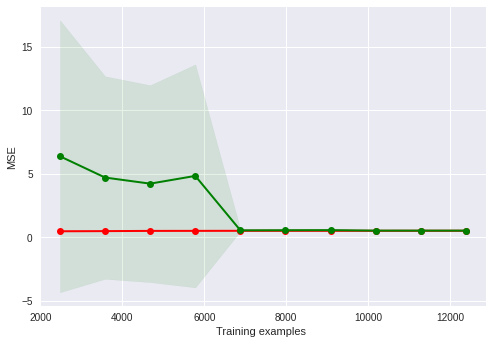

In [ ]:
plot_learning_curve(train_sizes,train_scores,test_scores) 

Observe that 
*Both curves have reached a plateau; they are close and fairly high.
*Few instances in the training set means the model can fit them perfectly. But as more instances are added to the training set, it becomes impossible for the model to fit the training data perfectly.
*When the model is trained on very few training instances, it is not able of generalizing properly, which is why the validation error is initially quite high. Then as the model learns on more training examples, the training and validation error reduce slowly.

These learning curves are typical of underfitting model.

#We can also study how training scales as the function of number of training samples.


In [ ]:
#@ title [Plot Scalability curves] 
def plot_scalability_curve(train_sizes, fit_times):
  train_score_mean = np.mean(-train_scores, axis=1)
  train_score_std = np.std(-train_scores, axis=1)
  test_score_mean = np.mean(-test_scores, axis=1)
  test_score_std = np.std(-test_scores, axis=1)
  fit_times_mean = np.mean(fit_times, axis=1)
  fit_times_std = np.std(fit_times, axis=1)

  plt.fill_between(train_sizes,
                   fit_times_mean - fit_times_std,
                   fit_times_mean + fit_times_std,
                   
                   alpha=0.1,
                   color='g',)
  
  plt.plot(train_sizes, fit_times_mean, "o-", color='b',lw=2)
  plt.xlabel("Training examples ")
  plt.ylabel("fit time")
  plt.legend(loc="best")  
  return plt.show() 

No handles with labels found to put in legend.


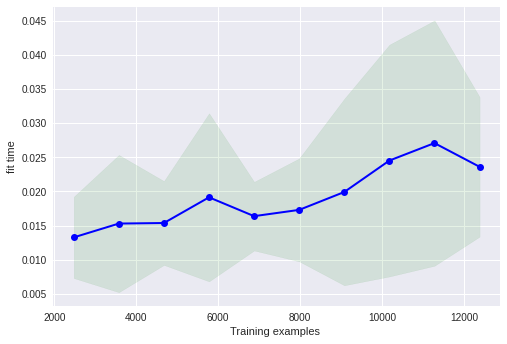

In [ ]:
plot_scalability_curve(train_sizes,fit_times)

As the number of training examples grows, the tie to fit also increases.
#Model examination

Let's examine the weight vectors and how much variability exists between them across different cross-validated models.


In [ ]:
feature_names=train_features.columns 
feature_names

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

## For this we will first construct a dataframe of weight vectors and then plot them with `box` plot.


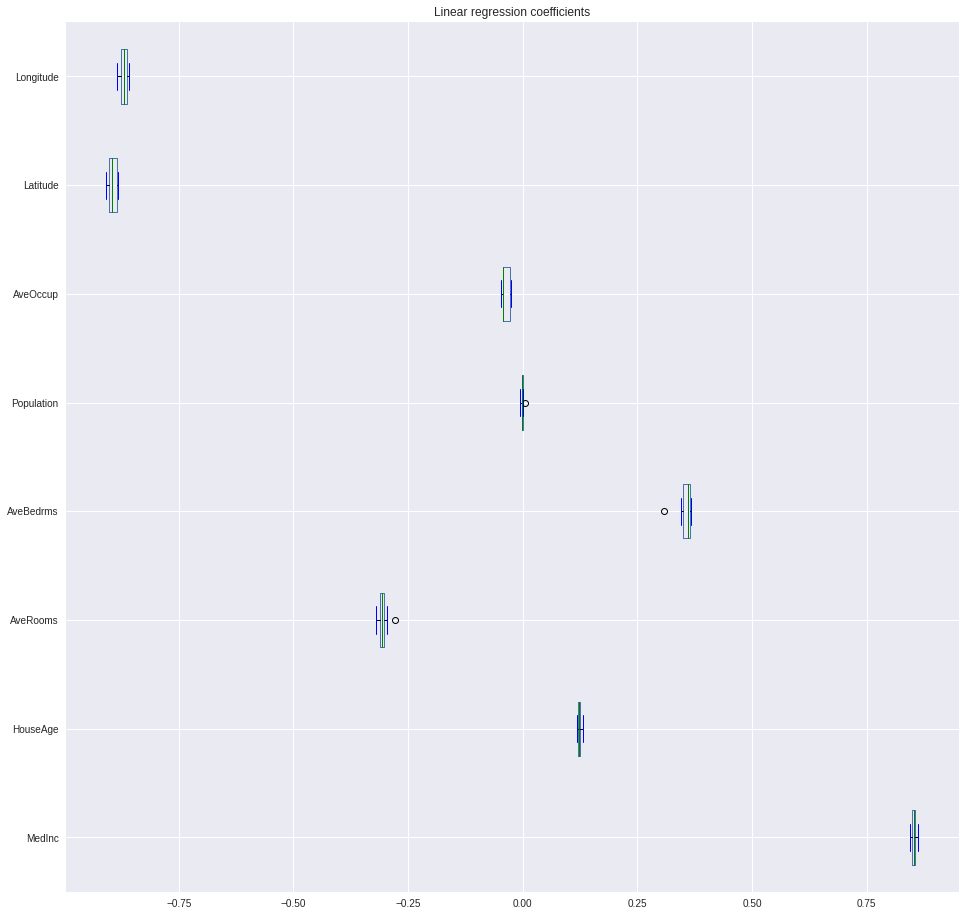

In [ ]:
coefs=[est[-1].coef_ for est in lin_reg_cv_results["estimator"]] 
weights_df = pd.DataFrame(coefs, columns=feature_names)

color = {'whiskers':"black","medians":"green","caps":"blue"}
weights_df.plot.box(color=color, vert=False,figsize=(16,16))
_=plt.title("Linear regression coefficients")

#There is not much variability in weights by different models. It can also by standard deviation of weights as seen in `std` row below

In [ ]:
weights_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.852153,0.122770,-0.304384,0.353528,-0.001576,-0.037059,-0.894011,-0.869753
std,0.005763,0.004312,0.010998,0.018044,0.003254,0.008582,0.009975,0.009097
min,0.843517,0.117394,-0.318971,0.307474,-0.005787,-0.047584,-0.908058,-0.884206
25%,0.848871,0.119895,-0.310778,0.349715,-0.002688,-0.042486,-0.901411,-0.876542
50%,0.852711,0.121592,-0.305795,0.360139,-0.002063,-0.042325,-0.895370,-0.869631
75%,0.854743,0.125520,-0.302980,0.364646,-0.000350,-0.027562,-0.883967,-0.862110
max,0.861659,0.130560,-0.278426,0.367952,0.005297,-0.026331,-0.881884,-0.857844



#Selecting best model 

Let's select the model with the lowest cross validated test error as the best performance model.



In [ ]:
#Let's find out the best model that resulted in the least test error.
best_model_index = np.argmin(test_error) 
selected_model = lin_reg_cv_results['estimator'][best_model_index]

Let's examine the model coefficients:


In [ ]:
print("Intercept (w_0):",selected_model['lin_reg'].intercept_)
print("coefficients($w_1,w_2...w_m):",selected_model['lin_reg'].coef_)

Intercept (w_0): 2.0779898917958657
coefficients($w_1,w_2...w_m): [ 8.44324888e-01  1.18463901e-01 -3.04619574e-01  3.56620503e-01
  1.74458509e-04 -4.23964612e-02 -8.96045642e-01 -8.68906479e-01]


#Model performance



Towards this, let's first obtain the predictions for test points in cross validation.



In [ ]:
from sklearn.model_selection import cross_val_predict 
cv_predictions = cross_val_predict(lin_reg_pipeline, train_features, train_labels)

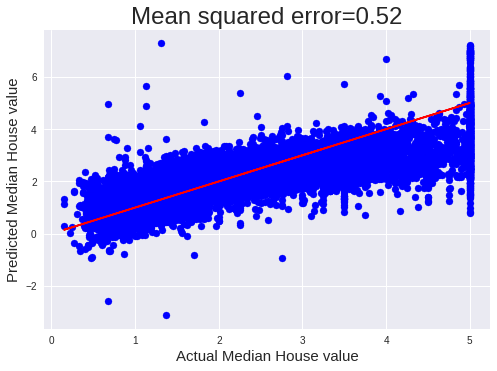

In [ ]:
mse_cv = mean_squared_error(train_labels,cv_predictions)

plt.scatter(train_labels, cv_predictions, color='blue')
plt.plot(train_labels, train_labels, 'r-')
plt.title(f"Mean squared error={mse_cv:.2f}",size=24)
plt.xlabel("Actual Median House value",size=15)
plt.ylabel("Predicted Median House value", size=15)
plt.show()

* The model seems to all over the place in its predictions for examples with label 5. 
* There are some negative predictions. We can fix this by adding a constraints on the weights to be positive.


At this stage, we should perform error analysis and check where the predictions are going wrong. We can revisit feature construction, preprocessing or model stages and make the necessary course corrections to get better performance.




#STEP: 5: Predictions 

We can use the best performing model from cross validation for getting predictions on the test set.


In [ ]:
test_predictions_cv = selected_model.predict(test_features)
test_predictions_cv[:5]

array([0.73548515, 1.7725621 , 2.70011199, 2.83716602, 2.60743151])

## We can use the best performing model from cross validation for getting predictions on the test set.



In [ ]:
test_predictions = lin_reg_pipeline.predict(test_features)
test_predictions[:5]

array([0.72412832, 1.76677807, 2.71151581, 2.83601179, 2.603755  ])

#Step 6: Report model performance 

We report model performance on the test set.


In [ ]:
score_cv = selected_model.score(test_features, test_labels) 
score = lin_reg_pipeline.score(test_features, test_labels)

print("R2 score for the best model obtained via cross validation:", score_cv)
print("R2 score for model without cv:", score) 



R2 score for the best model obtained via cross validation: 0.5923577635319088
R2 score for model without cv: 0.5910509795491352


Alternatively we can use any other metric of interest and report performance based on that. For example, the mean squared error is as follows:


In [ ]:
mse = mean_squared_error(test_labels,test_predictions)
mse_cv = mean_squared_error(test_labels, test_predictions_cv)

print("MSE for the best model obtained via cross validation:", mse_cv)
print("MSE for model without cv : ", mse)


MSE for the best model obtained via cross validation: 0.5393995876218523
MSE for model without cv :  0.5411287478470688


In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler 
X, y = fetch_california_housing(as_frame=True, return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,shuffle=False, test_size=0.2,random_state=0)

lin_reg_pipeline = Pipeline([
                             ('scaling', StandardScaler()),
                             ('lin_reg',LinearRegression())
])

lin_reg_pipeline.fit(X_train,y_train)
test_score = lin_reg_pipeline.score(X_test, y_test)
test_score

0.6605140591531992

In [ ]:
predicted_label = lin_reg_pipeline.predict(X_test)
mse=mean_squared_error(y_test, predicted_label)
np.sqrt(mse)


0.7033383507521878

In [ ]:
from sklearn.metrics import explained_variance_score 
explained_variance_score(y_test, predicted_label)

0.6605500501742703

In [ ]:
from sklearn.metrics import max_error 
max_error(y_test,predicted_label)

7.260453292958372

In [ ]:
from sklearn.metrics import mean_absolute_error 
mean_absolute_error(y_test, predicted_label)


0.5168526993787042

In [ ]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(y_test, predicted_label)

0.49468483563880755

In [ ]:
from sklearn.linear_model import SGDRegressor 
lin_reg_sgd = SGDRegressor(random_state=0)
sgd_pipeline = Pipeline([
                          ('scaling', StandardScaler()),
                          ('regressor',SGDRegressor(random_state=0))
                          
]) 
sgd_pipeline.fit(X_train,y_train) 

y_predict = sgd_pipeline.predict(X_test)
sgd_pipeline[-1].intercept_
sgd_pipeline[-1].coef_

array([ 0.84046697,  0.112331  , -0.41213039,  0.21595971, -0.01781887,
       -0.01480892, -0.87394103, -0.83913104])

#BaseLine Models

Now, we will build a couple of baseline models using `DummyRegression` and `permutation_test_score`. We will compare performance of our linear regression model with these two baselines.


In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.linear_model import LinearRegression 

from sklearn.model_selection import cross_validate 
from sklearn.model_selection import ShuffleSplit  
from sklearn.model_selection import permutation_test_score 
from sklearn.model_selection import train_test_split 

from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler 
from sklearn.dummy import DummyRegressor

#We will use `ShuffleSplit` as a cross validation strategy 



In [ ]:
shuffle_split_cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

Let's load the data and split it into training and test.


In [ ]:
features , labels = fetch_california_housing(as_frame=True, return_X_y=True)
train_features , test_features, train_labels, test_labels =train_test_split(features, labels,  random_state=42)


#LinearRegression classifier 

* Build linenar regression model with feature scaling as part of a pipeline.
* Train the model with 10-fold cross validation via `ShuffleSplit`.
* Capture errors on different folds.



In [ ]:
lin_reg_pipeline = Pipeline([
                             ('feature scaling', StandardScaler()),
                             ('lin_reg',LinearRegression())
])

lin_reg_cv_results = cross_validate(lin_reg_pipeline, train_features, train_labels, cv=shuffle_split_cv, scoring='neg_mean_absolute_error', n_jobs=2)
lin_reg_errors=pd.Series(-lin_reg_cv_results['test_score'],name='Linear regression error')

lin_reg_cv_results.keys()

dict_keys(['fit_time', 'score_time', 'test_score'])

#Returns of cross_validate score

scoresdict of float arrays of shape (n_splits,)

Array of scores of the estimator for each run of the cross validation.

A dict of arrays containing the score/time arrays for each scorer is returned. The possible keys for this dict are:

  `test_score`

The score array for test scores on each cv split. `Suffix_score` in `test_score` changes to a specific metric like `test_r2` or `test_auc` if there are multiple scoring metrics in the scoring parameter.

  `train_score`

The score array for train scores on each cv split. `Suffix_score` in `train_score` changes to a specific metric like `train_r2` or `train_auc` if there are multiple scoring metrics in the scoring parameter. This is available only if `return_train_score` parameter is `True`.

 `fit_time`

The time for fitting the estimator on the train set for each cv split.
 `score_time`

The time for scoring the estimator on the test set for each cv split. (Note time for scoring on the train set is not included even if return_train_score is set to True
 `estimator`

The estimator objects for each cv split. This is available only if `return_estimator` parameter is set to `True`.



#Dummy Regressor 

In [ ]:
def dummy_regressor_baseline(strategy, constant_val=None, quantile_val=None):
  baseline_model_median =DummyRegressor(strategy=strategy, 
                                        constant=constant_val,
                                        quantile=quantile_val)
  
  baseline_median_cv_results = cross_validate(baseline_model_median, train_features, train_labels, cv=shuffle_split_cv, n_jobs=2,  scoring='neg_mean_absolute_error')
  return pd.Series(-baseline_median_cv_results['test_score'],name="Dummy regressor error")


In [ ]:
baseline_median_cv_results_errors      = dummy_regressor_baseline(strategy='median')
baseline_mean_cv_results_errors        = dummy_regressor_baseline(strategy='mean')
baseline_constant_cv_results_errors    = dummy_regressor_baseline(strategy='constant',constant_val=2)
baseline_quantile_cv_results_errors    = dummy_regressor_baseline(strategy='quantile',quantile_val=0.55)





#Let's compare performance of these dummy regressors:


In [ ]:
dummy_error_df = pd.concat([baseline_median_cv_results_errors,    
baseline_mean_cv_results_errors ,       
baseline_constant_cv_results_errors,    
baseline_quantile_cv_results_errors],axis=1)

dummy_error_df.columns=["Median CV",'Mean CV','Constant CV','Quantile CV']
dummy_error_df['Median CV']

0    0.881187
1    0.873773
2    0.876366
3    0.892083
4    0.876835
5    0.874685
6    0.864097
7    0.888523
8    0.890963
9    0.886765
Name: Median CV, dtype: float64

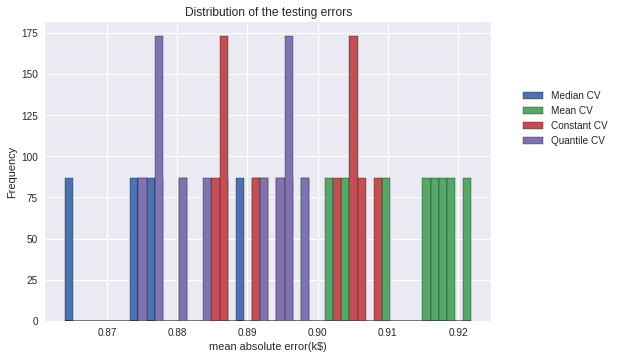

In [ ]:
dummy_error_df.plot.hist(bins=50, density=True,edgecolor='black')
plt.legend(bbox_to_anchor=(1.05,0.8), loc='upper left')
plt.xlabel("mean absolute error(k$)")
plt.ylabel('Frequency')
_=plt.title("Distribution of the testing errors")

#Permutation_test_score 

It permutes the target to generate randomized data and computes the empirical p-value against the null hypthesis, that features and targets are independent.

Here we are interested in `permutation_score` returned by this API, which indicates score of the model on different permutations.


In [ ]:
score, permutation_score, pvalue = permutation_test_score(lin_reg_pipeline, train_features, train_labels, cv=shuffle_split_cv, scoring='neg_mean_absolute_error',n_jobs=2, n_permutations=30)

permutation_errors = pd.Series(-permutation_score, name="Permuted error")

In [ ]:
print(permutation_score)

[-0.91446539 -0.91608713 -0.91501122 -0.91112203 -0.91326112 -0.91428719
 -0.91694297 -0.90660687 -0.90873595 -0.91546138 -0.9084695  -0.91174023
 -0.91857102 -0.91467076 -0.90396709 -0.91239289 -0.91095499 -0.91729623
 -0.90529415 -0.91436609 -0.91993036 -0.91661883 -0.91104746 -0.91563156
 -0.91014294 -0.91526135 -0.90680247 -0.90796435 -0.91032999 -0.91545574]


#Model Comparison

In [ ]:
error_df = pd.concat([lin_reg_errors,baseline_median_cv_results_errors,permutation_errors],axis =1)

Text(0.5, 0, 'Mean absolute error (k$)')

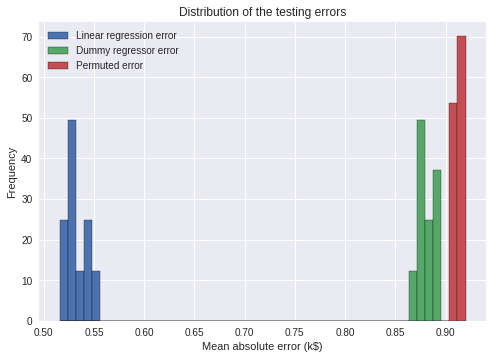

In [ ]:
error_df.plot.hist(bins=50, density=True, edgecolor='black')
plt.legend(loc='best')
_=plt.title('Distribution of the testing errors')
plt.xlabel("Mean absolute error (k$)")


#Linear regression with iterative optimization: SGDRegressor 
In this colab, we will build linear regression model, with `SGDRegressor`. SGD offers a lot of control over optimization procedure through a number of hyperparameters. However, we need to set them to right values in order to make it work for training the model.

#IMPORTS



In [ ]:
np.random.seed(306)

We will use `ShuffleSplit` as a cross validation strategy.


In [ ]:
shuffle_split_cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

Let's load the data and split it into training and test.

In [ ]:
features, labels = fetch_california_housing(as_frame=True, return_X_y=True) 
com_train_features, test_features, com_train_labels, test_labels = train_test_split(features, labels, random_state=42) 

# Divide the data into train and dev sets.


In [ ]:
train_features,dev_features, train_labels, dev_labels = train_test_split(com_train_features, com_train_labels, random_state=42)

In [ ]:
from sklearn.model_selection import validation_curve


#Baseline SGDRegressor 
* STEP 1: To begin with, we instantiate a baselinen `SGDRegressor` model with default parameters.
* STEP 2: Train the model with training feature matrix and labels
* STEP 3: Obtain the score on the training and devel data.


In [ ]:
sgd = SGDRegressor(random_state=42)
sgd.fit(train_features,train_labels)

train_mae = mean_absolute_error(train_labels, sgd.predict(train_features))
dev_mae   = mean_absolute_error(dev_labels, sgd.predict(dev_features))
print("Mean absolute error on Training set: ", train_mae)
print("mean absolute error on dev set", dev_mae)

Mean absolute error on Training set:  312995824045833.75
mean absolute error on dev set 315394681503071.94


We can observe that the mean absolute error is too high. The baseline model doesn't train well. This may happen due to large learning rate.

Let's investigate this issue by training the model step by step and recording training loss in each step.

#Adding a feature scaling step.

SGD is sensitive to feature scaling. Let's add a feature scaling step and check if we get better MAE.


In [ ]:
sgd_pipeline = Pipeline([
                         ('feature scaling ', StandardScaler() ),
                         ('sgd', SGDRegressor())
])

sgd_pipeline.fit(train_features, train_labels)
train_mae = mean_absolute_error(train_labels, sgd_pipeline.predict(train_features))
dev_mae = mean_absolute_error(dev_labels, sgd_pipeline.predict(dev_features)) 
print("mean absolute error on training set : ", train_mae)
print("mean absolute error on dev set :", dev_mae)

mean absolute error on training set :  0.5135804404077051
mean absolute error on dev set : 0.6373131245753217


##The error is still high let's run `SGDRegressor` step by step and investigate issues with training.

* STEP1: Instantiate `SGDRegressor`  with `warm_start = True` and `tol=-np.infty`.

* STEP2: Train SGD step by step and record regression loss in each step.

* STEP3: Plot learning curves and see if there are any issues in training.


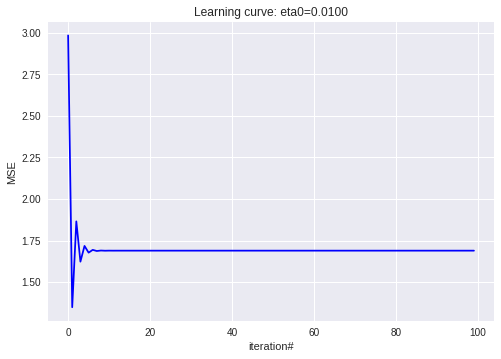

In [ ]:
eta0 = 1e-2 
sgd_pipeline = Pipeline([
                         ('feature_scaling', StandardScaler()),
                         ('sgd',SGDRegressor(max_iter=1, tol = -np.infty, warm_start=True, random_state=42))
])

loss = [] 
for epoch in range(100):
  sgd_pipeline.fit(train_features, train_labels) #continues where it left off 
  loss.append(mean_squared_error(train_labels, sgd_pipeline.predict(train_features))) 
plt.plot(np.arange(len(loss)), loss, 'b-')
plt.xlabel("iteration#")
plt.ylabel('MSE')
_=plt.title(f'Learning curve: eta0={eta0:.4f}')

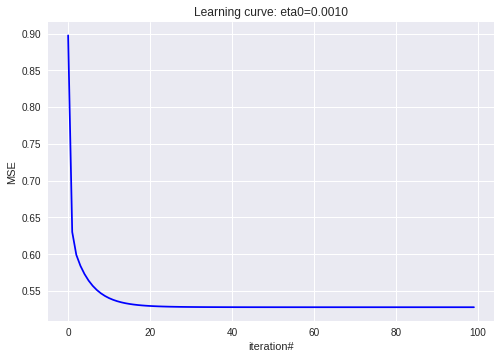

In [ ]:
eta0 = 1e-3
sgd_pipeline = Pipeline([
                         ('feature_scaling', StandardScaler()),
                         ('sgd',SGDRegressor(max_iter=1, tol = -np.infty, warm_start=True, eta0=eta0,random_state=42))
])

loss = [] 
for epoch in range(100):
  sgd_pipeline.fit(train_features, train_labels) #continues where it left off 
  loss.append(mean_squared_error(train_labels, sgd_pipeline.predict(train_features))) 
plt.plot(np.arange(len(loss)), loss, 'b-')
plt.xlabel("iteration#")
plt.ylabel('MSE')
_=plt.title(f'Learning curve: eta0={eta0:.4f}')

##The is an ideal learning curve where the train loss reduces monotonically as the training progresses.


In [ ]:
print("#iteration before reaching convergence criteria:", sgd_pipeline[-1].n_iter_) 
print("#weight updates:", sgd_pipeline[-1].t_)


#iteration before reaching convergence criteria: 1
#weight updates: 11611.0


In [ ]:
train_mae = mean_absolute_error(train_labels, sgd_pipeline.predict(train_features))
dev_mae = mean_absolute_error(dev_labels, sgd_pipeline.predict(dev_features))
print("mean absolute error on training set:", train_mae)
print("mean absolute error on dev set : ", dev_mae)

mean absolute error on training set: 0.5333732983042573
mean absolute error on dev set :  0.5190150280908042


#Fixing learning rate through validation curves

* STEP 1: Provide the list of values to be tried for a hyper-parameter.
* STEP 2: Instantiate an object of `validation_curve` with estimator, training features and label. Set `scoring` parameter to relevant score.
* STEP 3: Convert scores to error 
* STEP 4: Plot validation curve with the value of hyper-parameter on x-axis and error on the y-axis
* STEP 5: Fix the hyper-parameter value where the test error is the least.

In [ ]:
%%time 
eta0 = [1e-5, 1e-4, 1e-3, 1e-2]
train_scores ,test_scores = validation_curve(
    sgd_pipeline, com_train_features, com_train_labels, param_name="sgd__eta0", param_range=eta0, cv = shuffle_split_cv, scoring='neg_mean_squared_error', n_jobs=2
)


train_errors, test_errors = -train_scores, -test_scores

CPU times: user 323 ms, sys: 48 ms, total: 371 ms
Wall time: 1.39 s


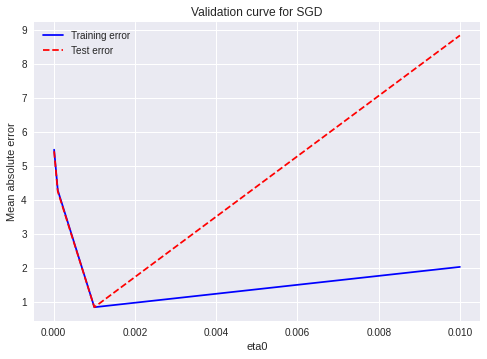

In [ ]:
train_errors, test_errors = - train_scores, -test_scores 
plt.plot(eta0, train_errors.mean(axis=1),'b-x',label="Training error")
plt.plot(eta0, test_errors.mean(axis=1),'r--x', label="Test error")
plt.legend() 
plt.xlabel("eta0")
plt.ylabel("Mean absolute error")
_=plt.title("Validation curve for SGD")

#for `eta0=1e-3`, the test error is the least and hence we select that value as the value for `eta0`. Next we also plot standard deviation in errors.



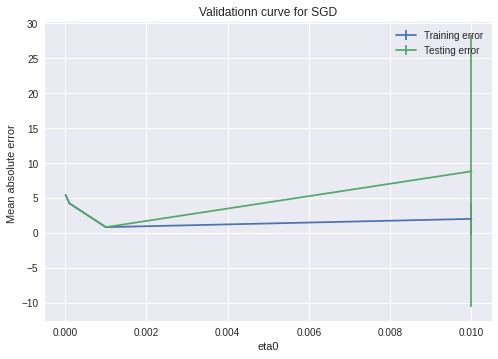

In [ ]:
plt.errorbar(eta0, train_errors.mean(axis=1), yerr=train_errors.std(axis=1), label="Training error")
plt.errorbar(eta0, test_errors.mean(axis=1),yerr=test_errors.std(axis=1), label="Testing error")
plt.legend() 
plt.xlabel("eta0")
plt.ylabel("Mean absolute error ")
_=plt.title("Validationn curve for SGD")

#SGDRegressor 



In [ ]:
sgd_pipeline = Pipeline([
                         ("feature_scaling", StandardScaler()),
                         ("sgd", SGDRegressor(max_iter=500,
                                              early_stopping=True,
                                              eta0=1e-3,
                                              tol=1e-3,
                                              validation_fraction=0.2,
                                              n_iter_no_change=5,
                                              average=10,
                                              random_state=42))
])

sgd_pipeline.fit(train_features, train_labels)

train_mae= mean_absolute_error(train_labels, sgd_pipeline.predict(train_features))
dev_mae = mean_absolute_error(dev_labels, sgd_pipeline.predict(dev_features))
print("Mean absolute error on Training set:", train_mae)
print("Mean absolute error on dev set:", dev_mae)

Mean absolute error on Training set: 0.579376454514559
Mean absolute error on dev set: 0.5689180241137523


In [ ]:
print("Number of SGD iterations# :", sgd_pipeline[-1].n_iter_)  #development set dev set
print("Number of weight updates: ", sgd_pipeline[-1].t_)

Number of SGD iterations# : 7
Number of weight updates:  81271.0


In [ ]:
sgd_pipeline = Pipeline([
                         ("feature_scaling", StandardScaler()),
                         ("sgd", SGDRegressor(max_iter=500,
                                              early_stopping=True,
                                              eta0=1e-3,
                                              tol=1e-3,
                                              learning_rate = 'constant',
                                              validation_fraction=0.2,
                                              n_iter_no_change=5,
                                              average=10,
                                              random_state=42))
])

sgd_pipeline.fit(train_features, train_labels)

train_mae= mean_absolute_error(train_labels, sgd_pipeline.predict(train_features))
dev_mae = mean_absolute_error(dev_labels, sgd_pipeline.predict(dev_features))
print("Mean absolute error on Training set:", train_mae)
print("Mean absolute error on dev set:", dev_mae)

print("Number of SGD iterations# :", sgd_pipeline[-1].n_iter_)  #development set dev set
print("Number of weight updates: ", sgd_pipeline[-1].t_)

Mean absolute error on Training set: 0.5359339681114987
Mean absolute error on dev set: 0.5151099728924144
Number of SGD iterations# : 8
Number of weight updates:  92881.0


In [ ]:
sgd_pipeline = Pipeline([
                         ("feature_scaling", StandardScaler()),
                         ("sgd", SGDRegressor(max_iter=500,
                                              early_stopping=True,
                                              eta0=1e-3,
                                              tol=1e-3,
                                              learning_rate = 'adaptive',
                                              validation_fraction=0.2,
                                              n_iter_no_change=5,
                                              average=10,
                                              random_state=42))
])

sgd_pipeline.fit(train_features, train_labels)

train_mae= mean_absolute_error(train_labels, sgd_pipeline.predict(train_features))
dev_mae = mean_absolute_error(dev_labels, sgd_pipeline.predict(dev_features))
print("Mean absolute error on Training set:", train_mae)
print("Mean absolute error on dev set:", dev_mae)

print("Number of SGD iterations# :", sgd_pipeline[-1].n_iter_)  #development set dev set
print("Number of weight updates: ", sgd_pipeline[-1].t_)

Mean absolute error on Training set: 0.5340193046836148
Mean absolute error on dev set: 0.5198356196858102
Number of SGD iterations# : 33
Number of weight updates:  383131.0


#Setting `max_iters`  


In [ ]:
max_iter = np.ceil(1e6/com_train_features.shape[0])
max_iter

65.0

In [ ]:
sgd_pipeline = Pipeline([
                         ("feature_scaling", StandardScaler()),
                         ("sgd", SGDRegressor(max_iter=max_iter,
                                              early_stopping=True,
                                              eta0=1e-3,
                                              tol=1e-3,
                                              learning_rate = 'constant',
                                              validation_fraction=0.2,
                                              n_iter_no_change=5,
                                              average=10,
                                              random_state=42))
])

sgd_pipeline.fit(train_features, train_labels)

train_mae= mean_absolute_error(train_labels, sgd_pipeline.predict(train_features))
dev_mae = mean_absolute_error(dev_labels, sgd_pipeline.predict(dev_features))
print("Mean absolute error on Training set:", train_mae)
print("Mean absolute error on dev set:", dev_mae)

print("Number of SGD iterations# :", sgd_pipeline[-1].n_iter_)  #development set dev set
print("Number of weight updates: ", sgd_pipeline[-1].t_)

Mean absolute error on Training set: 0.5359339681114987
Mean absolute error on dev set: 0.5151099728924144
Number of SGD iterations# : 8
Number of weight updates:  92881.0


#Summary 

In this notebook, we saw:
* how to build `SGDRegressor` model.
* how to tune the learning rate.
* how to use different `learning_rates` and their impact on convergence.
* how to use early stopping and averaged SGD
* how to tune hyper-parameters with `validation_curves`.

#Week 4: begin here...


---



---



#California housing dataset 

This colab introduces California housing dataset that we will be using for regression demonstration.
We also list down the steps for typical dataset exploration, which can be applied broadly  to any dataset.


#Loading the dataset 

This dataset can be fetched from `sklaearn` with `fetch_california_housing API.



In [ ]:
from sklearn.datasets import fetch_california_housing
from scipy.stats import loguniform 
from scipy.stats import uniform

In order to analyze the dataset, let's load it as a dataframe. 


In [ ]:
california_housing = fetch_california_housing(as_frame=True)
type(california_housing)

sklearn.utils.Bunch

The bunch object is a dictionary like object with the following attributes:
* `data`, which is a pandas object (since `as_frame=True`). Each row corresponds to 8 features values.
* `target` value contains average house value in units of 100_000. This is also a pandas object (since `as_frame=True`).
* DESCR contains description of the dataset.
* `frame` contains dataframe with data and target 

Each of these attributes can be accessed as `<bunch_object>`.key. In our case, we can access these features as follows:
* `california_housing.data` gives us access to contents of `data` key.
* `california_housing.target` gives us access to contents of `target` key. 
* `california_housing.feature_names` gives us access to contents of `feature_names` key. 
* `california_housing.DESCR` gives us access to contents of `DESCR` key. 
* `california_housing.frame` gives us access to contents of `frame` key. 

#Dataset exploration 
# STEP 1: Dataset description
Let's look at the description of the dataset. 


In [ ]:
print(california_housing.DESCR)


.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

Note down key statistics from this description such as number of examples (or sample or instances) from the description.
* There are **20640 examples** in the dataset.
* There are **8 numberical attributes** per example
* The target label is median house value.
* There are **no missing values** in this dataset.

#STEP2: Examine shape of feature matrix 
Number of examples and features can be obtained via `shape of california_housing.data`


In [ ]:
california_housing.data.shape

(20640, 8)

In [ ]:
type(california_housing.data)

pandas.core.frame.DataFrame

#STEP: 3 Examine shape of label 

Let's look at the shape of label vector 


In [ ]:
california_housing.target.shape

(20640,)

In [ ]:
type(california_housing.target)

pandas.core.series.Series

#STEP 4: Feature names
Let's find out names of the attributes.


In [ ]:
california_housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

Note the attributes and their description, which is a key step in understanding the data.
* MedInc-median income in block
* HouseAge- median house age in  block 
* AveRooms- average number of rooms 
* AveBedrms - average number of bedrooms
* Population- block population
* AveOccup- Average house occupancy
* Latitude - house block latitude 
* Longitude -house block longitude 

#STEP 5: Examine sample training examples 

Let's look at a few training examples along with labels.


In [ ]:
california_housing.frame.head() # frame.head() for feature with labels

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


The dataset contains aggregated data about each district in California 

#STEP 6: Examine features
Let's look at the features.

In [ ]:
california_housing.data.head() # data.head() only for features 


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


We have information about 
* Demography of each district (income, population, house occupancy,
* Location of the disctricts (latitude and longitude) and 
* Characteristics of houses in the district (#rooms, #bedrooms, age of house) 

Since the information is aggregated at the district levels, the features corresponds to average or median.

#STEP 7: Examine target 
Let's look at the target to be predicted.


In [ ]:
california_housing.target.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

The target contains median of the house value for each district. You can see that the target is a real number and hence this is a regression problem.

#STEP 8: Examine details of features and labels 
let's look at the details of features and target labels.


In [ ]:
california_housing.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


We observe that
* The dataset contains 20640 examples with 8 features.
* All features are numerical features encoded as floating point numbers.
* There are no missing values in any features - the `Non-null` is equal to the number of examples in the training set.
#STEP 9: Feature and target histograms.
Let's look at the distribution of these features and target by plotting their histograms.



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt 


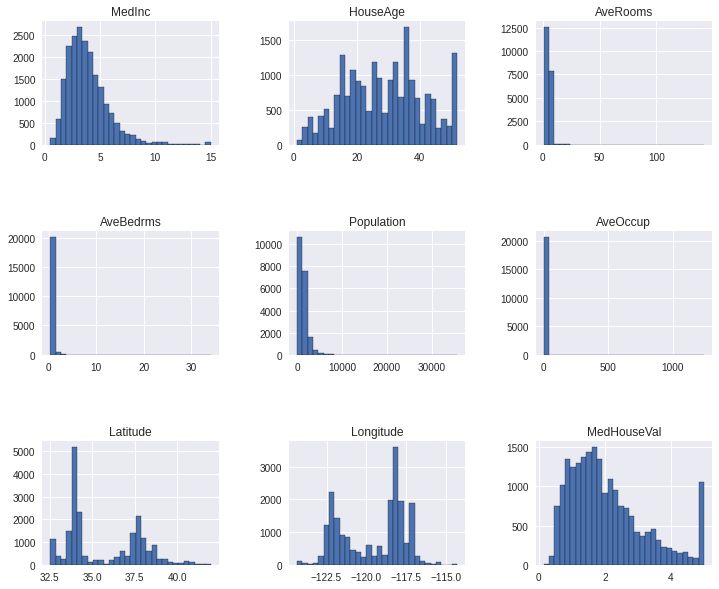

In [ ]:
california_housing.frame.hist(figsize=(12,10),bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

Let's observe these histogram and note down our findings:

* **MedInc** has a long tail distribution-salary of people is more or less normally distributed with a few folks getting a high salary.
* **HouseAge** has more or less a uniform distribution.
* The range for features, **AveRooms, AveBedrms, AveOccups, Population**, is large and its contains a small number of large values(as there are unnoticable bins on the right in the histograms plots of these features). That would mean that there could be certain outlier values present in these features.
* **Latitude and Longitude** carry geographical information. Their combination helps us decide price of the house.
* **MedHouseVal** also has a long tail distribution. It spikes towards the end. The reason is that the houses with price more than 5 are given value of 5.


#STEP 10: FEATURES AND TARGET STATISTICS 

Let's look at statistics of these features and target.


In [ ]:
california_housing.frame.describe() 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


We can observe that there is a large difference between 75% and `max` values of `AveRooms`, `AveBedrms`, `population` and `AveOccups`-which confirms our intuition about presencce of outliers or extreme values in these features.


#STEP 11:  Pairplot 


In [ ]:
#_=sns.pairplot(data=california_housing.frame, hue = 'MedHouseVal', palette='viridis')

A few observations based on pairplot: 
* `MedIncome` seems to be useful in distinguishing between low and high valued houses.
* A few features have extreme values.
* Latitude and logitude together seem to distinguish between low and high valued houses.

#Summary 
* Explored california housing dataset that would be used for demonstrating implementation of linear regression models.

* Examined various statistics of the dataset - #samples, #labels 
* Examined distribution of features through histogram and pairplots.

#Lecture 4.5 



---



---

#Linear Regression for house price prediction

In this colab, we will build different linear regression models for california house price prediction: 
1. Linear regression (with normal equation and iterative optimization)
2. Polynomial regression 
3. Regularized regression models-ridge and lasso 

We will set regularization rate and polynomial degree with hyper-parameter tuning and cross validation 

We will compare different models in terms of their parameter vectors and mean absolute error on train, devel and test sets.


#Imports 

For regression problem, we need to import classes and utilities from `sklearn.linear_model`.
* This module has implementation for different regression models like, `LinearRegression, SGDRegressor, Ridge, Lasso, RidgeCV` and `LassoCV`.

We also need to import a bunch of model selection utilities from `sklearn.model_selection` module and metrics from `sklearn.metrics` module.

The data preprocessing utilities are imported from `sklearn.preprocessing` modules.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from scipy.stats import loguniform 
from scipy.stats import uniform 

from sklearn.datasets import fetch_california_housing 
from sklearn.dummy import DummyRegressor 
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge 
from sklearn.linear_model import RidgeCV 
from sklearn.linear_model import SGDRegressor 

from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_percentage_error 

from sklearn.model_selection import cross_validate 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import train_test_split  
from sklearn.model_selection import ShuffleSplit 
from sklearn.model_selection import validation_curve 
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import StandardScaler 

from sklearn.pipeline import Pipeline 




#Common set up

Set up random seed to a number of your choice.
 
 

In [ ]:
np.random.seed(306)


Let's use `ShuffleSplit` as cv with 10 splits and 20% examples set aside as test examples. 



In [ ]:
cv = ShuffleSplit(n_splits =10 , test_size=0.2, random_state=42) # this is used below in pipeline declaration


#Data Loading and splitting

We use california housing dataset for this demo. We will load this dataset with `fetch_california_housing` API as a dataframe.

We will load the data and split it inot three parts- train, dev  and test. Train+Dev will be used for cross validation and test will be used for evaluating the trained models.



In [ ]:
#Fetch dataset 
features, labels = fetch_california_housing(as_frame=True, return_X_y=True) 

#train-test-split 
com_train_features ,test_features, com_train_labels , test_labels = train_test_split(features, labels, random_state=42)

#train --> train + dev split 
train_features, dev_features, train_labels, dev_labels = train_test_split(com_train_features, com_train_labels , random_state=42) 



#Linear regression wtih normal equation 

Let's use normal equation method to train linear regression model.
We set up pipeline with two stages: 
* Feature scaling to scale features and 
* Linear regression on the transformed feature matrix.

Throughout this colab, we will have the following pattern for each estimator:
* We will be using `pipeline` for combining data preprocessing and modeling steps. * `cross_validate` for training the model with `ShuffleSplit` cross validation and `neg_mean_absolute_error` as a scoring metric.
* Convert the scores to error and report mean absolute errors on the dev set.

In [ ]:
lin_reg_pipeline = Pipeline([ 
                             ("feature_scaling", StandardScaler()),
                             ("lin_reg", LinearRegression())
]) 


lin_reg_cv_results = cross_validate(lin_reg_pipeline,
                                    com_train_features,
                                    com_train_labels,
                                    cv=cv,
                                    scoring="neg_mean_absolute_error",
                                    return_train_score=True,
                                    return_estimator=True) 

lin_reg_train_error = -1*lin_reg_cv_results['train_score']  
lin_reg_test_error =-1*lin_reg_cv_results['test_score']


print(f"Mean absolute error of linear regression model on the train set:\n" f"{lin_reg_train_error.mean():.3f}+/-{lin_reg_train_error.std():.3f}")

print(f"Mean absolute error of linear regression model on the test set:\n" f"{lin_reg_test_error.mean():.3f}+/-{lin_reg_test_error.std():.3f}")

Mean absolute error of linear regression model on the train set:
0.530+/-0.002
Mean absolute error of linear regression model on the test set:
0.527+/-0.008


Both the errors are close, but are not low. This points to underfitting. We can address it by adding more feature through polynomial regression.

#Linear regression with SGD 

Let's use iterative optimization method to train linear regressionn model.

We set up pipeline with two stages:
* Feature scaling to scale features and 
* SGD regression on the transformed feature matrix 


In [ ]:
sgd_reg_pipeline = Pipeline([
                             ('feature_scaling',StandardScaler()),
                             ('sgd_reg',SGDRegressor(max_iter=np.ceil(1e6/com_train_features.shape[0]),
                                                     early_stopping=True, 
                                                     eta0=1e-4,
                                                     learning_rate='constant',
                                                     tol=1e-5,
                                                     validation_fraction=0.1,
                                                     n_iter_no_change = 5,
                                                     average=10, 
                                                     random_state=42))
])

sgd_reg_cv_results =cross_validate(sgd_reg_pipeline,
                                   com_train_features,
                                   com_train_labels,
                                   cv = cv, # shufflesplit declared above 
                                   scoring ='neg_mean_absolute_error',
                                   return_train_score=True,
                                   return_estimator=True)

sgd_train_error = -1*sgd_reg_cv_results['train_score']
sgd_test_error = -1*sgd_reg_cv_results['test_score']

print(f"Mean absolute error of SGD regression model on the train set:\n" f"{sgd_train_error.mean():.3f}+/-{sgd_train_error.std():.3f}")

print(f"Mean absolute error of SGD regression model on the test set:\n" f"{sgd_test_error.mean():.3f}+/-{sgd_test_error.std():.3f}")

Mean absolute error of SGD regression model on the train set:
0.564+/-0.023
Mean absolute error of SGD regression model on the test set:
0.561+/-0.025


#Polynomial regression 
We will train a polynomial model with degree 2 and later we will use `validation_curve` to find out right degree to use for polynomial models. `PolynomialFeatures` transforms the features to the user specified degrees (here it is 2). We perform feature scaling on the transformed features before using them for training the regression model.
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [ ]:
poly_reg_pipeline =Pipeline([ 
                             ('poly',PolynomialFeatures(degree=2)),
                             ('feature_scaling',StandardScaler()),
                             ('lin_reg',LinearRegression())])

poly_reg_cv_results = cross_validate(poly_reg_pipeline,
                                     com_train_features,
                                     com_train_labels,
                                     cv =cv,
                                     scoring='neg_mean_absolute_error',
                                     return_train_score = True,
                                     return_estimator=True) 

poly_reg_train_error = -1*poly_reg_cv_results['train_score']
poly_reg_test_error = -1*poly_reg_cv_results['test_score'] 

print(f"Mean absolute error of polynomial regression model of degree 2 on the train set: \n" f"{poly_reg_train_error.mean():.3f}+/-{poly_reg_train_error.std():.3f}")

print(f"Mean absolute error of polynomial regression model of degree 2 on the test set: \n" f"{poly_reg_test_error.mean():.3f}+/-{poly_reg_test_error.std():.3f}")


Mean absolute error of polynomial regression model of degree 2 on the train set: 
0.461+/-0.003
Mean absolute error of polynomial regression model of degree 2 on the test set: 
0.485+/-0.030


Notice that the training and validation errors have reduced after using the second order polynomial features to represent the model.

Instead of using all polynomial feature, we use only interaction feature terms in polynomial model and train the linear regression model.



In [ ]:
poly_reg_pipeline =Pipeline([ 
                             ('poly',PolynomialFeatures(degree=2,interaction_only=True)),
                             ('feature_scaling',StandardScaler()),
                             ('lin_reg',LinearRegression())])

poly_reg_cv_results = cross_validate(poly_reg_pipeline,
                                     com_train_features,
                                     com_train_labels,
                                     cv =cv,
                                     scoring='neg_mean_absolute_error',
                                     return_train_score = True,
                                     return_estimator=True) 

poly_reg_train_error = -1*poly_reg_cv_results['train_score']
poly_reg_test_error = -1*poly_reg_cv_results['test_score'] 

print(f"Mean absolute error of polynomial regression model of degree 2 on the train set: \n" f"{poly_reg_train_error.mean():.3f}+/-{poly_reg_train_error.std():.3f}")

print(f"Mean absolute error of polynomial regression model of degree 2 on the test set: \n" f"{poly_reg_test_error.mean():.3f}+/-{poly_reg_test_error.std():.3f}")


Mean absolute error of polynomial regression model of degree 2 on the train set: 
0.478+/-0.003
Mean absolute error of polynomial regression model of degree 2 on the test set: 
0.497+/-0.024


Let's figure out which degree polynomial is better suited for the regression problem at our hand. For that we will use `validation_curve`, which can be considered as a manual huperparameter tuning.

Here we specify a list of values that we want to try for polynomial degree and specify it as a parameter in `validation_curve`. 


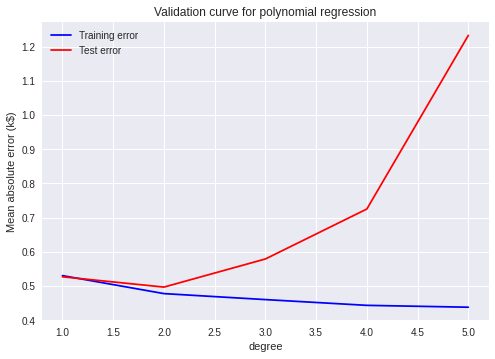

In [ ]:
degree = [1,2,3,4,5] 

train_scores, test_scores = validation_curve(
    poly_reg_pipeline, com_train_features,com_train_labels, param_name = 'poly__degree',
    param_range = degree, cv = cv, scoring='neg_mean_absolute_error', n_jobs=2
)

train_errors, test_errors = -train_scores, -test_scores 
plt.plot(degree, train_errors.mean(axis=1), 'b-x', label ="Training error")
plt.plot(degree, test_errors.mean(axis=1),'r-x', label= "Test error")
plt.legend() 

plt.xlabel("degree")
plt.ylabel("Mean absolute error (k$)")
_ = plt.title("Validation curve for polynomial regression")

We would select a degree for which the mean absolute error is the least. In this case, it is degree =2 that yields the least mean absolute error and that would be selected as an optimal degree for polynomial regression. 

#Ridege regression 

`The polynomial models have a tendency to overfit - if we use higher order polynomial `features. We will use `Ridge` regression - which penalizes for excessive model complexity in the polynomial regression by adding a regularization term. Here we specify the regularization rate `alpha` as 0.5 and train the regression model. Later we will launch hyperparameter search for the right value of `alpha` such that it leads to the least cross validation errors.



In [ ]:
ridge_reg_pipeline =Pipeline([ 
                             ('poly',PolynomialFeatures(degree=2)),
                             ('feature_scaling',StandardScaler()),
                             ('ridge',Ridge(alpha=0.5))])

ridge_reg_cv_results = cross_validate(ridge_reg_pipeline,
                                     com_train_features,
                                     com_train_labels,
                                     cv =cv,
                                     scoring='neg_mean_absolute_error',
                                     return_train_score = True,
                                     return_estimator=True) 

ridge_reg_train_error = -1*ridge_reg_cv_results['train_score']
ridge_reg_test_error = -1*ridge_reg_cv_results['test_score'] 

print(f"Mean absolute error of ridge regression model (alpha=0.5) the train set: \n" f"{ridge_reg_train_error.mean():.3f}+/-{ridge_reg_train_error.std():.3f}")

print(f"Mean absolute error of ridge regression model (alpha=0.5) the test set: \n" f"{ridge_reg_test_error.mean():.3f}+/-{ridge_reg_test_error.std():.3f}")


Mean absolute error of ridge regression model (alpha=0.5) the train set: 
0.481+/-0.003
Mean absolute error of ridge regression model (alpha=0.5) the test set: 
0.487+/-0.006


#HPT for ridge regularization rate 



In [ ]:
alpha_list = np.logspace(-4,0, num=20)
ridge_reg_pipeline = Pipeline([
                               ('poly',PolynomialFeatures(degree=2)),
                               ('feature_scaling', StandardScaler()),
                               ('ridge_cv', RidgeCV(alphas = alpha_list,cv =cv , scoring='neg_mean_absolute_error'))
]) 

ridge_reg_cv_results = ridge_reg_pipeline.fit(com_train_features, com_train_labels)

In [ ]:
print("The score wtih the best alpha is:", f"{ridge_reg_cv_results[-1].best_score_:.3f}")
print("The error wtih the best alpha is:", f"{-ridge_reg_cv_results[-1].best_score_:.3f}")
print("The best value for alpha:", ridge_reg_cv_results[-1].alpha_)

The score wtih the best alpha is: -0.473
The error wtih the best alpha is: 0.473
The best value for alpha: 0.007847599703514606


#RidgeCV with cross validation 



In [ ]:
'''alpha_list =[0.001,0.01,0.1,1]
ridge_cv =RidgeCV(alphas=alpha_list)
ridge_cv.fit(com_train_features,com_train_labels)
ridge_cv.score(com_train_features,com_train_labels)'''


'alpha_list =[0.001,0.01,0.1,1]\nridge_cv =RidgeCV(alphas=alpha_list)\nridge_cv.fit(com_train_features,com_train_labels)\nridge_cv.score(com_train_features,com_train_labels)'

# Ridge HPT through `GridSearchCV` 



In [ ]:
ridge_grid_pipeline =Pipeline([ 
                             ('poly',PolynomialFeatures(degree=2)),
                             ('feature_scaling',StandardScaler()),
                             ('ridge',Ridge())])

param_grid ={"poly__degree": (1,2,3),
             "ridge__alpha": np.logspace(-4,0, num=20)}
          

ridge_grid_search = GridSearchCV(ridge_grid_pipeline,
                                     param_grid=param_grid,                                 
                                     n_jobs=2,
                                     cv =cv,
                                     scoring='neg_mean_absolute_error',
                                     return_train_score = True) 
ridge_grid_search.fit(com_train_features, com_train_labels)


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size=0.2, train_size=None),
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('feature_scaling', StandardScaler()),
                                       ('ridge', Ridge())]),
             n_jobs=2,
             param_grid={'poly__degree': (1, 2, 3),
                         'ridge__alpha': array([1.00000000e-04, 1.62377674e-04, 2.63665090e-04, 4.28133240e-04,
       6.95192796e-04, 1.12883789e-03, 1.83298071e-03, 2.97635144e-03,
       4.83293024e-03, 7.84759970e-03, 1.27427499e-02, 2.06913808e-02,
       3.35981829e-02, 5.45559478e-02, 8.85866790e-02, 1.43844989e-01,
       2.33572147e-01, 3.79269019e-01, 6.15848211e-01, 1.00000000e+00])},
             return_train_score=True, scoring='neg_mean_absolute_error')

`ridge_grid_search.best_index_` gives the index of the best parameter in the list.


In [ ]:
mean_train_error = -1* ridge_grid_search.cv_results_['mean_train_score'][ridge_grid_search.best_index_]
mean_test_error = -1* ridge_grid_search.cv_results_['mean_test_score'][ridge_grid_search.best_index_]
std_train_error = -1* ridge_grid_search.cv_results_['std_train_score'][ridge_grid_search.best_index_]
std_test_error = -1* ridge_grid_search.cv_results_['std_test_score'][ridge_grid_search.best_index_]


print(f'Best Mean absolute error of polynomial ridge regression model on the train set:\n' f"{mean_train_error:.3f}+/-{std_train_error:.3f}")

print(f'Best Mean absolute error of polynomial ridge regression model on the test set:\n' f"{mean_test_error:.3f}+/-{std_test_error:.3f}")

Best Mean absolute error of polynomial ridge regression model on the train set:
0.463+/--0.004
Best Mean absolute error of polynomial ridge regression model on the test set:
0.474+/--0.015


,


In [ ]:
print("Mean cross validated score of the best estimator is:", ridge_grid_search.best_score_)
print("Mean cross validated error of the best estimator is :", -ridge_grid_search.best_score_)

Mean cross validated score of the best estimator is: -0.4738651176991914
Mean cross validated error of the best estimator is : 0.4738651176991914


Note that this is same as RidgeCV that we carried out earlier. 

In [ ]:
print("The best parameter value is :", ridge_grid_search.best_params_)

The best parameter value is : {'poly__degree': 2, 'ridge__alpha': 0.007847599703514606}


#Lasso regression

Baseline model with fixed learning rate 



In [ ]:
 lasso_reg_pipeline = Pipeline([
                                ('poly',PolynomialFeatures(degree=2,interaction_only=True)),
                                ('feature_scaling',StandardScaler()),
                                ('lasso',Lasso(alpha=0.001))
 ])

 lasso_reg_cv_results = cross_validate(lasso_reg_pipeline,
                                       com_train_features,
                                       com_train_labels,
                                       scoring='neg_mean_absolute_error',
                                       return_train_score=True,
                                       return_estimator=True )
 
 lasso_reg_train_error = -1* lasso_reg_cv_results['train_score']
 lasso_reg_test_error =-1*lasso_reg_cv_results['test_score']

 print(f'Mean absolute error of linear rgression model on the train set:\n' f'{lasso_reg_train_error.mean():.3f}+/-{lasso_reg_train_error.std():.3f}') 

 print(f'Mean absolute error of linear rgression model on the test set:\n' f'{lasso_reg_test_error.mean():.3f}+/-{lasso_reg_test_error.std():.3f}') 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.776e+02, tolerance: 1.643e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.102e+02, tolerance: 1.673e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

Mean absolute error of linear rgression model on the train set:
0.509+/-0.009
Mean absolute error of linear rgression model on the test set:
0.517+/-0.010


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.023e+02, tolerance: 1.643e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


#Lasso with cross validation 



#Lasso with `GridSearchCV` 



In [ ]:
lasso_grid_pipeline =Pipeline([ 
                             ('poly',PolynomialFeatures()),
                             ('feature_scaling',StandardScaler()),
                             ('lasso',Lasso())])

param_grid ={"poly__degree": (1,2,3),
             "lasso__alpha": np.logspace(-4,0, num=20)}
          

lasso_grid_search = GridSearchCV(lasso_grid_pipeline,
                                     param_grid=param_grid,                                 
                                     n_jobs=2,
                                     cv =cv,
                                     scoring='neg_mean_absolute_error',
                                     return_train_score = True) 
lasso_grid_search.fit(com_train_features, com_train_labels)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.638e+03, tolerance: 2.066e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size=0.2, train_size=None),
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('feature_scaling', StandardScaler()),
                                       ('lasso', Lasso())]),
             n_jobs=2,
             param_grid={'lasso__alpha': array([1.00000000e-04, 1.62377674e-04, 2.63665090e-04, 4.28133240e-04,
       6.95192796e-04, 1.12883789e-03, 1.83298071e-03, 2.97635144e-03,
       4.83293024e-03, 7.84759970e-03, 1.27427499e-02, 2.06913808e-02,
       3.35981829e-02, 5.45559478e-02, 8.85866790e-02, 1.43844989e-01,
       2.33572147e-01, 3.79269019e-01, 6.15848211e-01, 1.00000000e+00]),
                         'poly__degree': (1, 2, 3)},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [ ]:
mean_train_error = -1* lasso_grid_search.cv_results_['mean_train_score'][lasso_grid_search.best_index_]
mean_test_error = -1* lasso_grid_search.cv_results_['mean_test_score'][lasso_grid_search.best_index_]
std_train_error = -1* lasso_grid_search.cv_results_['std_train_score'][lasso_grid_search.best_index_]
std_test_error = -1* lasso_grid_search.cv_results_['std_test_score'][lasso_grid_search.best_index_]


print(f'Best Mean absolute error of polynomial lasso regression model on the train set:\n' f"{mean_train_error:.3f}+/-{std_train_error:.3f}")

print(f'Best Mean absolute error of polynomial lasso regression model on the test set:\n' f"{mean_test_error:.3f}+/-{std_test_error:.3f}")

Best Mean absolute error of polynomial lasso regression model on the train set:
0.462+/--0.003
Best Mean absolute error of polynomial lasso regression model on the test set:
0.488+/--0.046


In [ ]:
print("Mean cross validated score of the best estimator is:", lasso_grid_search.best_score_)

Mean cross validated score of the best estimator is: -0.48798304453391356


In [ ]:
print("The best parameter value is:", lasso_grid_search.best_params_)

The best parameter value is: {'lasso__alpha': 0.0001, 'poly__degree': 3}


#SGD: Regularization and HPT (Hyperparameter tuning)

We can also perform regularization with SGD. `SGDRegressor` has many hyperparameters that require careful tuning to achieve the same performance as wtih `LinearRegression`.



In [ ]:
poly_sgd_pipeline = Pipeline([
                              ('poly',PolynomialFeatures()),
                              ('feature_scaling', StandardScaler()),
                              ('sgd_reg',SGDRegressor(
                                  penalty ='elasticnet',
                                  random_state =42
                              ))  ])
poly_sgd_cv_results =  cross_validate(poly_sgd_pipeline, 
                                      com_train_features,
                                      com_train_labels,
                                      cv =cv,
                                      scoring='neg_mean_absolute_error',
                                      return_train_score =True,
                                      return_estimator=True)

poly_sgd_train_error = -1*poly_sgd_cv_results['train_score']
poly_sgd_test_error = -1* poly_sgd_cv_results['test_score']


print(f"Mean absolute error of SGD regression model on the train set. \n {poly_sgd_train_error.mean():.3f}+/{poly_sgd_train_error.std():.3f}")

print(f"Mean absolute error of SGD regression model on the test set. \n {poly_sgd_test_error.mean():.3f}+/{poly_sgd_test_error.std():.3f}")

Mean absolute error of SGD regression model on the train set. 
 10824283052.546+/4423288211.832
Mean absolute error of SGD regression model on the test set. 
 10946788540.250+/5396536227.703


Let's search for the best set of parameters for polynomial + SGD pipeline with `RandomizedSearchCV`.
> Remember in `RandomizedSearchCV`, We need to specify distributions for hyperparameters.


In [ ]:
class uniform_int:
  """ Integer valued version of the uniform distributions""" 
  def __init__(self, a, b):
    self._distribution = uniform(a,b) 
  def rvs(self, *args, **kwargs):
    """ Random  variable sample""" 
    return self._distribution.rvs(*args,**kwargs).astype(int) 
    

Let's specify `RandomizedSearchCV` set up.


In [ ]:
import numpy as np
param_distributions = {
    'poly__degree':[1,2,3],
    'sgd_reg__learning_rate': ['constant', 'adaptive', 'invscaling'],
    'sgd_reg__l1_ratio': uniform(0,1),
    'sgd_reg__eta0': loguniform(1e-5,1),
    'sgd_reg__power_t': uniform(0,1)
} 

poly_sgd_random_search = RandomizedSearchCV(
    poly_sgd_pipeline, param_distributions=param_distributions, n_iter =10, cv=cv, verbose=1, scoring='neg_mean_absolute_error'
)

poly_sgd_random_search.fit(com_train_features,com_train_labels)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size=0.2, train_size=None),
                   estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                             ('feature_scaling',
                                              StandardScaler()),
                                             ('sgd_reg',
                                              SGDRegressor(penalty='elasticnet',
                                                           random_state=42))]),
                   param_distributions={'poly__degree': [1, 2, 3],
                                        'sgd_reg__eta0': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f08aea003d0>,
                                        'sgd_reg__l1_ratio': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f08a82dfc50>,
                                        'sgd_reg__learning_rate': ['constant',
                                                                   'a

The best score can be obtained as follows: 


In [ ]:
poly_sgd_random_search.best_score_ 


-0.5268619575210475

The best set of parameters are obtained as follows:


In [ ]:
poly_sgd_random_search.best_params_

{'poly__degree': 1,
 'sgd_reg__eta0': 0.0001245606580946974,
 'sgd_reg__l1_ratio': 0.381880971508068,
 'sgd_reg__learning_rate': 'adaptive',
 'sgd_reg__power_t': 0.2255544008276702}

And the best estimator can be accessed with `best_estimator_` member variable.


#Comparision of weight vectors

Let's look at the weight vectors produced by different models.

In [ ]:
feature_names = poly_reg_cv_results["estimator"][0][0].get_feature_names_out(input_features=train_features.columns)
print(type(poly_reg_cv_results['estimator']))
print(feature_names[0])
print(feature_names) 
print(poly_reg_cv_results['estimator'][0][-1])
print(type(coefs))
print(coefs[:2])



<class 'list'>
1
['1' 'MedInc' 'HouseAge' 'AveRooms' 'AveBedrms' 'Population' 'AveOccup'
 'Latitude' 'Longitude' 'MedInc HouseAge' 'MedInc AveRooms'
 'MedInc AveBedrms' 'MedInc Population' 'MedInc AveOccup'
 'MedInc Latitude' 'MedInc Longitude' 'HouseAge AveRooms'
 'HouseAge AveBedrms' 'HouseAge Population' 'HouseAge AveOccup'
 'HouseAge Latitude' 'HouseAge Longitude' 'AveRooms AveBedrms'
 'AveRooms Population' 'AveRooms AveOccup' 'AveRooms Latitude'
 'AveRooms Longitude' 'AveBedrms Population' 'AveBedrms AveOccup'
 'AveBedrms Latitude' 'AveBedrms Longitude' 'Population AveOccup'
 'Population Latitude' 'Population Longitude' 'AveOccup Latitude'
 'AveOccup Longitude' 'Latitude Longitude']
LinearRegression()
<class 'list'>
[array([ 8.44324888e-01,  1.18463901e-01, -3.04619574e-01,  3.56620503e-01,
        1.74458509e-04, -4.23964612e-02, -8.96045642e-01, -8.68906479e-01]), array([ 0.85871421,  0.12258718, -0.31897149,  0.36795169, -0.00578729,
       -0.04758437, -0.88188417, -0.86093191

In [ ]:
coefs = [est[-1].coef_ for est in poly_reg_cv_results['estimator']]
weights_polynomial_regression = pd.DataFrame(coefs, columns=feature_names)

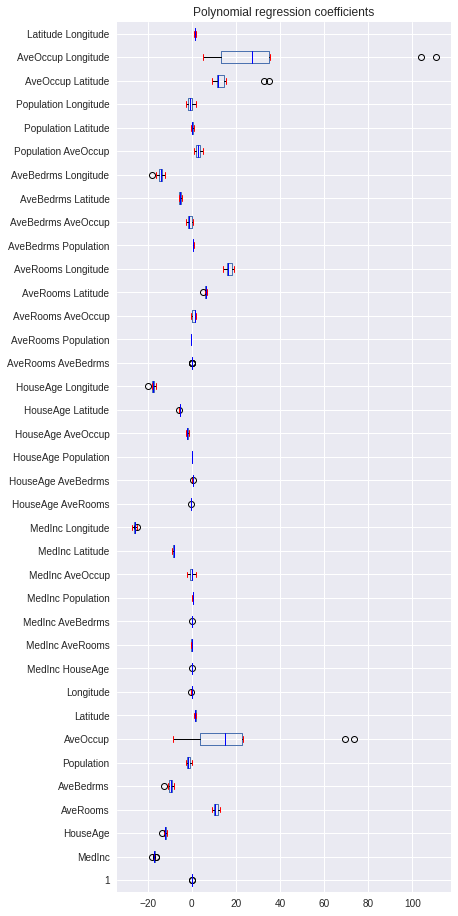

In [ ]:
color = {"whiskers": "black", "medians":"blue", "caps":"red"}
weights_polynomial_regression.plot.box(color=color, vert=False, figsize=(6,16)) 
_=plt.title("Polynomial regression coefficients")

In [ ]:
#feature_names = ridge_reg_cv_results["estimator"][0][0].get_feature_names_out(input_features=train_features.columns) 
#feature_names
ridge_reg_pipeline =Pipeline([ 
                             ('poly',PolynomialFeatures(degree=2)),
                             ('feature_scaling',StandardScaler()),
                             ('ridge',Ridge(alpha=0.5))])

ridge_reg_cv_results = cross_validate(ridge_reg_pipeline,
                                     com_train_features,
                                     com_train_labels,
                                     cv =cv,
                                     scoring='neg_mean_absolute_error',
                                     return_train_score = True,
                                     return_estimator=True) 



feature_names = ridge_reg_cv_results['estimator'][0][0].get_feature_names_out(input_features=train_features.columns)
feature_names

array(['1', 'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup', 'Latitude', 'Longitude', 'MedInc^2', 'MedInc HouseAge',
       'MedInc AveRooms', 'MedInc AveBedrms', 'MedInc Population',
       'MedInc AveOccup', 'MedInc Latitude', 'MedInc Longitude',
       'HouseAge^2', 'HouseAge AveRooms', 'HouseAge AveBedrms',
       'HouseAge Population', 'HouseAge AveOccup', 'HouseAge Latitude',
       'HouseAge Longitude', 'AveRooms^2', 'AveRooms AveBedrms',
       'AveRooms Population', 'AveRooms AveOccup', 'AveRooms Latitude',
       'AveRooms Longitude', 'AveBedrms^2', 'AveBedrms Population',
       'AveBedrms AveOccup', 'AveBedrms Latitude', 'AveBedrms Longitude',
       'Population^2', 'Population AveOccup', 'Population Latitude',
       'Population Longitude', 'AveOccup^2', 'AveOccup Latitude',
       'AveOccup Longitude', 'Latitude^2', 'Latitude Longitude',
       'Longitude^2'], dtype=object)

In [ ]:
coefs = [est[-1].coef_ for est in ridge_reg_cv_results['estimator']]
weights_polynomial_regression=pd.DataFrame(coefs, columns=feature_names)

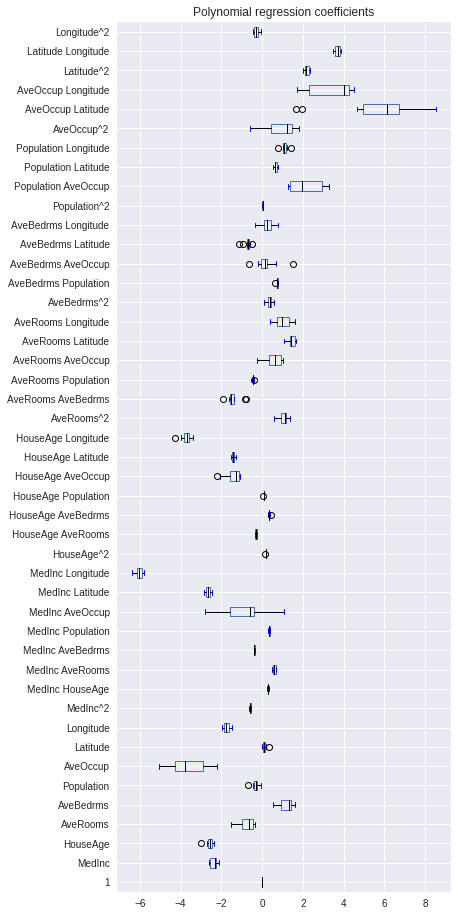

In [ ]:
color={"whiskers":"black","medians":"black", "caps":"blue"}
weights_polynomial_regression.plot.box(color=color, vert=False, figsize=(6,16))
_ = plt.title("Polynomial regression coefficients")

#Performance on the test set

#Baseline 


In [ ]:
baseline_model_median = DummyRegressor(strategy='median')
baseline_model_median.fit(train_features, train_labels)  
mean_absolute_percentage_error(test_labels, baseline_model_median.predict(test_features))

0.5348927548151625

#Linear regression with normal equation 



In [ ]:
mean_absolute_percentage_error(test_labels, lin_reg_cv_results['estimator'][0].predict(test_features))

0.32120472175482906

In [ ]:
mean_absolute_percentage_error(test_labels, poly_sgd_random_search.best_estimator_.predict(test_features))

0.318818281467605

#Polynomial regression 



In [ ]:
poly_reg_pipeline.fit(com_train_features, com_train_labels) 

mean_absolute_percentage_error(test_labels, poly_reg_pipeline.predict(test_features))

0.28199759082657244

#Ridge regression 


In [ ]:
mean_absolute_percentage_error(test_labels, ridge_grid_search.best_estimator_.predict(test_features))

0.27110336451421413

#Lasso regression 

Let's retrain the lasso model with `alpha` identified through hyper-parameter and evaluate it on the test data.


In [ ]:
mean_absolute_percentage_error(test_labels, lasso_grid_search.best_estimator_.predict(test_features))

0.28074969263810107

#Summary 
We trained multiple linear rgression models on housing dataset. Set their hyperparameters through hyper-parameter optimization. retrained models with the best values of hyper-parameters and then evaluated their performance on the test data (that was hold back until final evaluation) 

This is how most of the real world problems are solved starting from simple models to more sophisticated models. 

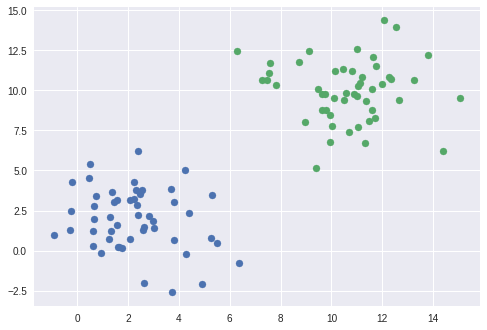

In [ ]:
np.random.seed(1)
x1 = np.random.normal(2,2,size=100).reshape(50,2)
x2 = np.random.normal(10,2, 100).reshape(50,2)
x=np.concatenate([x1,x2])
np.random.permutation(x)[:5]


plt.scatter(x1[:,0],x1[:,1])
plt.scatter(x2[:,0],x2[:,1])
